In [1]:
from __future__ import division
from matplotlib.backends.backend_pdf import PdfPages

class DNNLayer:
    type = ""
    
    #input activation related
    Xw = 0 # input activation width
    Xh = 0 # input activation height
    Xd = 0 # input activation depth (= filter depth kd)
    
    #output activation related
    Yw = 0 # output activation width
    Yh = 0 # output activation height
    Yd = 0 # output activation depth (= number of filters)
    
    #filter related
    numFilters = 0 # number of filters (= output activation depth)
    Kw = 0 # filter/kernel/convulution width
    Kh = 0 # filter/kernel/convulution height
    Kd = 0 # filter/kernel/convulution depth (= input activation depth xd)
    
    # di
    numNeurons = 0 #number of neuron in this layer
    # w
    numParam = 0 # number of parmeters (including bias) between the previous layer and this layer
    
    @classmethod
    def InputLayer(cls, weidth, height, depth):
        curL = DNNLayer()
        curL.type = "input"
        
        #image related
        curL.Yw = weidth
        curL.Yh = height
        curL.Yd = depth
        
        return curL
    
    @classmethod
    def FCLayer(cls, prevL, neurons):
        curL = DNNLayer()
        curL.type = "FC"
        
        curL.numNeurons = neurons
        curL.numParam  = prevL.numNeurons * curL.numNeurons        
        return curL
    
    @classmethod
    def ConvLayer(cls, prevL, nk, kw, kh, kd, stride, padding, pooling):
        curL = DNNLayer()
        curL.type = "conv"
        
        #input activation related
        curL.Xw = prevL.Yw
        curL.Xh = prevL.Yh
        curL.Xd = prevL.Yd
        
        #filter related
        curL.numFilters = nk
        curL.Kw = kw
        curL.Kh = kh
        curL.Kd = kd #curL.xd
        
        
        #output activation related
        if padding==True: # arbitrary padding
            curL.Yw = curL.Xw
            curL.Yh = curL.Xh
        else:
            curL.Yw = (curL.Xw - curL.Kw)/stride + 1
            curL.Yh = (curL.Xh - curL.Kh)/stride + 1
        if pooling == True:
            curL.Yw = math.floor(curL.Yw/2)
            curL.Yh = math.floor(curL.Yh/2)
        curL.Yd =  curL.numFilters
        
        # number of neurons
        curL.numNeurons = curL.Yw * curL.Yh * curL.Yd
       
        # for each neuron: kw * kh * kd connections
        # assuming the same parameter for each neurons in a depth slice (each filter)
        curL.numParam = ((curL.Kw * curL.Kh * curL.Kd) + 1) * curL.numFilters # +1 for bias
        return curL
    
    @classmethod
    def ConvLayer1(cls, prevL, nk, kw, kh, stride, padding, pooling):
        curL = DNNLayer()
        curL.type = "conv"
        
        #input activation related
        curL.Xw = prevL.Yw
        curL.Xh = prevL.Yh
        curL.Xd = prevL.Yd
        
        #filter related
        curL.numFilters = nk
        curL.Kw = kw
        curL.Kh = kh
        curL.Kd = curL.Xd
        
        
        #output activation related
        
        curL.Yw = math.floor((curL.Xw - curL.Kw + 2*padding)/stride) + 1
        curL.Yh = math.floor((curL.Xh - curL.Kh + 2*padding)/stride) + 1
        
        if pooling == True:
            curL.Yw = math.floor(curL.Yw/2)
            curL.Yh = math.floor(curL.Yh/2)
        curL.Yd =  curL.numFilters
        
        # number of neurons
        curL.numNeurons = curL.Yw * curL.Yh * curL.Yd
       
        # for each neuron: kw * kh * kd connections
        # assuming the same parameter for each neurons in a depth slice (each filter)
        curL.numParam = ((curL.Kw * curL.Kh * curL.Kd) + 1) * curL.numFilters # +1 for bias
        return curL  

# AlexNet Layers
class AlexNetArch:
    Layers = []
    def __init__(self):
        self.Layers = []
        self.Layers.append(DNNLayer.InputLayer(227, 227, 3))
        self.Layers.append(DNNLayer.ConvLayer(self.Layers[0], 96, 11, 11, 3, 4, False, False))
        self.Layers.append(DNNLayer.ConvLayer(self.Layers[1], 256, 5, 5, 48, 1, True, True))
        self.Layers.append(DNNLayer.ConvLayer(self.Layers[2], 384, 3, 3, 256, 1, True, True))
        self.Layers.append(DNNLayer.ConvLayer(self.Layers[3], 384, 3, 3, 192, 1, True, False))
        self.Layers.append(DNNLayer.ConvLayer(self.Layers[4], 256, 3, 3, 192, 1, True, True))
        self.Layers.append(DNNLayer.FCLayer(self.Layers[5], 4096))
        self.Layers.append(DNNLayer.FCLayer(self.Layers[6], 4096))
        self.Layers.append(DNNLayer.FCLayer(self.Layers[7], 1000))
        
    def PrintParam(self):
        for i in range(1,9):
            print(self.Layers[i].numNeurons)
            print(self.Layers[i].numParam)

    def Weights(self):
        W = []
        for i in range(1,9):
            W.append(self.Layers[i].numParam)
        return W
    
    def Neurons(self):
        d = []
        for i in range(1,9):
            d.append(self.Layers[i].numNeurons)
        return d
    
    

# ResNet50 Layers
class ResNet50Arch:
    Layers = []
    def __init__(self):
        self.Layers = []
        self.Layers.append(DNNLayer.InputLayer(224, 224, 3)) 
        #prevL, nk, kw, kh, kd, stride, padding, pooling
        curLayer = 0
        self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 64, 7, 7, 2, 3, True))
        #self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 64, 3, 3, 2, 1, True))
        curLayer+=1
        
        for i in range(1,4):
            self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 64, 1, 1, 1, 0, False))
            curLayer+=1
            self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 64, 3, 3, 1, 1, False))
            curLayer+=1
            self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 256, 1, 1, 1, 0, False))
            curLayer+=1
            
        self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 128, 1, 1, 2, 0, False))
        curLayer+=1
        self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 128, 3, 3, 1, 1, False))
        curLayer+=1
        self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 512, 1, 1, 1, 0, False))
        curLayer+=1
            
        for i in range(1,4):
            self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 128, 1, 1, 1, 0, False))
            curLayer+=1
            self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 128, 3, 3, 1, 1, False))
            curLayer+=1
            self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 512, 1, 1, 1, 0, False))
            curLayer+=1
        
        self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 256, 1, 1, 2, 0, False))
        curLayer+=1
        self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 256, 3, 3, 1, 1, False))
        curLayer+=1
        self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 1024, 1, 1, 1, 0, False))
        curLayer+=1
        for i in range(1,6):
            self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 256, 1, 1, 1, 0, False))
            curLayer+=1
            self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 256, 3, 3, 1, 1, False))
            curLayer+=1
            self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 1024, 1, 1, 1, 0, False))
            curLayer+=1
            
        self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 512, 1, 1, 2, 0, False))
        curLayer+=1
        self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 512, 3, 3, 1, 1, False))
        curLayer+=1
        self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 512, 1, 1, 1, 0, False))
        curLayer+=1
        for i in range(1,3):
            self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 512, 1, 1, 1, 0, False))
            curLayer+=1
            self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 512, 3, 3, 1, 1, False))
            curLayer+=1
            self.Layers.append(DNNLayer.ConvLayer1(self.Layers[curLayer], 2048, 1, 1, 1, 0, False))
            curLayer+=1
        
     
        self.Layers.append(DNNLayer.FCLayer(self.Layers[curLayer], 1000))
        curLayer+=1
        #self.Layers.append(DNNLayer.FCLayer(self.Layers[6], 4096))
        #self.Layers.append(DNNLayer.FCLayer(self.Layers[7], 1000))
        
    def PrintParam(self):
        numlayers = len(self.Layers)
        print("Number of Layers = ", numlayers)
        for i in range(1,numlayers):
            print(self.Layers[i].numNeurons)
            print(self.Layers[i].numParam)

    def Weights(self):
        numlayers = len(self.Layers)
        W = []
        for i in range(1,numlayers):
            W.append(self.Layers[i].numParam)
        return W
    
    def Neurons(self):
        numlayers = len(self.Layers)
        d = []
        for i in range(1,numlayers):
            d.append(self.Layers[i].numNeurons)
        return d


In [41]:
import math
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline
import operator



# B: minibatch size
# d: activation size
def ModelParallel(B, d, Pr, Pc, alpha, beta):
    t_latency = alpha * math.ceil(math.log(Pr,2))
    t_bandwidth = B * ((Pr-1)/Pr) * beta *  d / Pc
    t_modelParallel = 3 * (t_latency + t_bandwidth)
    return t_modelParallel

# B: minibatch size
# W: weights
def DataParallel(B, W, Pr, Pc, alpha, beta):
    t_latency = alpha * math.ceil(math.log(Pc,2))
    t_bandwidth = ((Pc-1)/Pc) * beta *  W / Pr
    t_dataParallel = 2 * (t_latency + t_bandwidth)
    return t_dataParallel

# Xw : input width
# Xc: input channels
# Kh: Kernel height (convolution size)
def DomainParallel(layer, B, Pr, Pc, alpha, beta): 
    P = Pr * Pc
    t_forward = alpha + beta * (B/Pc) *  layer.Xw * layer.Xd * (layer.Kh - 1)
    #t_backward1 = alpha * math.ceil(math.log(Pr,2)) + ((Pr-1)/Pr) * beta *  layer.numParam 
    t_backward1 = alpha * math.ceil(math.log(P,2)) + ((P-1)/P) * beta *  layer.numParam # combining reduction of data parallism as well
    t_backward2 = alpha + beta * (B/Pc) *  layer.Yw * layer.Yd * (layer.Kh - 1)
    t_domainParallel = t_forward + 2* t_backward1 + t_backward2 
    return t_domainParallel, 2*t_backward1 # last comm time is for W





def AlexNetComp(B, Pr, Pc):
    batch = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
    time1node_total = [29,33,38,48,61,90,148,265,477,936,1871,3773]
    P = Pr * Pc
    t_iter = 0
    if(P<=B):
        perProcBatch = B/P
        idx = batch.index(perProcBatch) 
        t_iter = time1node_total[idx]
    else:
        parts = P/B
        t_iter = time1node_total[0]/parts


    t_iter = t_iter  / 1000
    return t_iter

def ResNet50Comp(B, Pr, Pc):
    batch = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
    time1node = [86, 102, 128, 181, 285, 465, 1000, 2356, 5461, 11514, 24514] 
    time1node_H2 = [95, 112, 129, 163, 230, 351, 579, 1224, 3081, 6973, 14758]
    time1node_H4 = [77, 95, 107, 129, 169, 240, 370, 670, 1397, 3290, 7163]
    
    
    perProcBatch = B/Pc
    
    if perProcBatch in batch: # emperical
        idx = batch.index(perProcBatch)  
        t_H1 = time1node[idx]
        t_H2 = time1node_H2[idx]
        t_H4 = time1node_H4[idx]
    else: #extrapolate
        extrapolate = InterpolatedUnivariateSpline(np.log2(batch), np.log2(time1node), k=1)
        t_H1 = 2**extrapolate(np.log2(perProcBatch))
        extrapolate = InterpolatedUnivariateSpline(np.log2(batch), np.log2(time1node_H2), k=1)
        t_H2 = 2**extrapolate(np.log2(perProcBatch))
        extrapolate = InterpolatedUnivariateSpline(np.log2(batch), np.log2(time1node_H4), k=1)
        t_H4 = 2**extrapolate(np.log2(perProcBatch))
        
    
    t_iter = 0;

    if(Pr==1):
        t_iter = t_H1  
    elif(Pr==2):
        t_iter = t_H2  
    elif(Pr==4):
        t_iter = t_H4  
    else:
        #extralolate
        xi = [1, 2, 4]
        yi = [t_H1, t_H2, t_H4]
        # spline order: 1 linear, 2 quadratic, 3 cubic ... 
        order = 1
        extrapolate = InterpolatedUnivariateSpline(np.log2(xi), np.log2(yi), k=order)
        t_iter = 2**extrapolate(np.log2(Pr)) 
        
    #print('comp: perProcBatch t_H1, t_H2, t_H4, t_iter, Pr: ', perProcBatch, t_H1, t_H2, t_H4, t_iter, Pr)
    t_iter = t_iter/ 1000
    return t_iter


def NaiveTrainingAlexNet(Pr, Pc, B, trainSize, transition_layer = 5):
    numLayers = 8
    convSize = [11, 5, 3, 3, 3]
    widthxChannel = [672, 5280, 6912, 4992, 4992]
    #d = [55*55*96, 27*27*256, 13*13*192*2, 13*13*192*2, 13*13*256, 4096, 4096, 1000]
    #W = [35000, 307000, 885000, 663000, 442000, 38000000, 17000000, 4000000]
    alexnet = AlexNetArch()
    W = alexnet.Weights()
    d = alexnet.Neurons()
 
    
    alpha = 2/1000000
    beta = 1/(6*2**30)*4
    
    itersPerEpoch = math.ceil(trainSize / B)
    
    modelComm = 0 # model + data parallel
    domainComm = 0 # domain + data parallel
    domainModelComm = 0 # model/domain + data parallel
    domainModelWComm = 0 # model/domain + data parallel communication portion for Weight allreduce


    comp = AlexNetComp(B, Pr, Pc)
    for i in range(0, 8):
        data = DataParallel(B, W[i], Pr, Pc, alpha, beta)
        model = ModelParallel(B, d[i], Pr, Pc, alpha, beta);
        if(i < transition_layer): 
            domain, domain_w_comm = DomainParallel(alexnet.Layers[i+1], B, Pr, Pc, alpha, beta) # data is built in here
        else: 
            domain = model + data
            domain_w_comm = data
        domainComm += domain 
        modelComm += (model + data)
        domainModelComm += min(model + data, domain)
        if model + data < domain:
            domainModelWComm += data
        else:
            domainModelWComm += domain_w_comm
                
        #print(Pr, Pc, B, domain * itersPerEpoch)
        

    
    # per epoch costs
    comp = comp * itersPerEpoch
    modelComm  = modelComm * itersPerEpoch
    domainComm = domainComm * itersPerEpoch
    domainModelComm = domainModelComm * itersPerEpoch
    domainModelWComm = domainModelWComm * itersPerEpoch
    #print(comp, modelComm, domainComm, domainModelComm, domainModelWComm)
    return comp, modelComm, domainComm, domainModelComm, domainModelWComm



def TrainingDNN(Pr, Pc, B, trainSize, DNNType):
    
    if(DNNType == "AlexNet"):
        DNN = AlexNetArch()
    elif(DNNType == "ResNet50"): 
        DNN = ResNet50Arch()
    else:
        Print("Unknown DNN: Returning")
        return
    W = DNN.Weights()
    d = DNN.Neurons()
    
    alpha = 2/1000000
    beta = 1/(6*2**30)*4
    
    itersPerEpoch = math.ceil(trainSize / B)
    
    totalComm = 0 # model + data parallel
    wComm = 0 # communication portion for Weight allreduce


    if(DNNType == "AlexNet"):
        comp = AlexNetComp(B, Pr, Pc) 
        
    elif(DNNType == "ResNet50"): 
        comp = ResNet50Comp(B, Pr, Pc) 
    
    
    P = Pr * Pc
    firstFC=0
    for i in range(0, len(DNN.Layers)-1):
        if(DNN.Layers[i+1].type == "conv"):
            if(P<=B): # use batch parallelism only
                data = DataParallel(B, W[i], 1, Pr*Pc, alpha, beta) 
                totalComm += data
                wComm += data
            else: 
                Pc_batch = B # 1 image per processor
                Pr_domain = P/B
                domain, domain_w_comm = DomainParallel(DNN.Layers[i+1], B, Pr_domain, Pc_batch, alpha, beta) # data is built in here
                totalComm += domain
                wComm += domain_w_comm
        else:
            if(firstFC==0):
                firstFC = 1
                ConvToFC = alpha * math.ceil(math.log(Pr,2)) + B * ((Pr-1)/Pr) * beta *  d[i] / Pc
                totalComm += ConvToFC
            data = DataParallel(B, W[i], Pr, Pc, alpha, beta)
            model = ModelParallel(B, d[i], Pr, Pc, alpha, beta)
            totalComm = totalComm + data + model
            wComm += data
        
        
     
    # per epoch costs
    comp = comp * itersPerEpoch
    totalComm  = totalComm * itersPerEpoch
    wComm = wComm * itersPerEpoch
    return comp, totalComm, wComm     


In [22]:
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = .4  # previous pdf hatch linewidth

import matplotlib.pyplot as plt
#plotData is a kx5 matrix
# 1st column: pr
# 2nd column: pc
# 3rd column: comp
# 4th column: commModel
# 5th column: commData
def MyBarPlot(plotData, title, domainP=0, useLegend=1, ymax=0, filePrefix=""):
    nbars = plotData.shape[0];
    width = 0.65   
    ind = np.arange(nbars)
    comp = plotData[:,2]
    #print("inside plot: ", comp)
    comm = plotData[:,3]
    Wcomm = plotData[:,4] # Portion of communication only for weight all-reduce
    #dataComm = plotData[:,4]
    f = plt.figure()
    # Scale indices for same width plots
    ind = 1. / float(nbars) * ind


    p1 = plt.bar(ind  , comp, width=0.08, bottom=comm, color='b')
    p2 = plt.bar(ind  , comm, width=0.08, color = 'coral')
    p3 = plt.bar(ind  , Wcomm, width=0.08, color = 'orange', hatch='x'*6)
    # print(Wcomm)
    # print(comm)
    #create x labels
    xlabels = []
    for i in range(0,nbars):
        xlabels.append(str(int(plotData[i,0])) + 'x' + str(int(plotData[i,1])))
    
    plt.ylabel('Time (s)')
    plt.xlabel('$P_r\ X\ P_c$')
    #plt.title('Model and Data')
    ax = plt.gca()
    #ax.set_xlim((1, 10))


    ax.yaxis.grid(color='gray', linestyle='dotted')
    ax.set_axisbelow(True)
    plt.title(title)
    plt.xticks(ind, xlabels)
    
    # Compute best time
    if(ymax!=0):
        axes = plt.gca()
        axes.set_ylim([0,ymax])
    ymin, ymax = ax.get_ylim()

    best_time_ind = np.argmin(comp+comm)
    best_time = np.min(comp[best_time_ind]+comm[best_time_ind])

    best_comm_ind = np.argmin(comm)
    best_comm = np.min(comm[best_comm_ind])
    
    print("best_time_ind: ", best_time_ind, "best_comm_ind: " , best_comm_ind)
    print("best Wcomm: ", Wcomm[best_time_ind], "best_other: " , comm[best_time_ind] - Wcomm[best_time_ind])
    
    if(best_time_ind > 0):
        
        ax.text(float(best_time_ind+0.78)/nbars, 1.1*best_time/ymax, "{:.1f}".format((comm[0]+comp[0])/best_time) + 'x' +'\n(' + "{:.1f}".format((comm[0])/best_comm) + 'x)',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=12,weight = 'bold')


    
    if(useLegend==1):
        if(domainP==0):
            plt.legend((p1[0], p2[0], p3[0]), ('Computation', 'Model Comm.', 'Batch Comm.'))
        else:
            plt.legend((p1[0], p2[0], p3[0]), ('Computation','Model/Domain Comm.', 'Batch Comm.'))
    #plt.show()
    #f.savefig(filePrefix + "Comm_Comp_" + title.replace(" ", ""), bbox_inches='tight')

    
    


#plotData is a kx5 matrix
# 1st column: pr
# 2nd column: pc
# 3rd column: comp
# 4th column: commModel
# 5th column: commData
def MyBarPlotComm(plotData, title, domainP=0):
    nbars = plotData.shape[0];
    width = 0.65   
    ind = np.arange(nbars)
    comp = plotData[:,2]
    #print("inside plot: ", comp)
    comm = plotData[:,3]
    Wcomm = plotData[:,4] # Portion of communication only for weight all-reduce
    #dataComm = plotData[:,4]
    f = plt.figure()
    # Scale indices for same width plots
    ind = 1. / float(nbars) * ind


    #p1 = plt.bar(ind  , comp, width=0.08, bottom=comm, color='b')
    p2 = plt.bar(ind  , comm, width=0.08, color = 'coral')
    p3 = plt.bar(ind  , Wcomm, width=0.08, color = 'orange', hatch='x'*6)
    # print(Wcomm)
    # print(comm)
    #create x labels
    xlabels = []
    for i in range(0,nbars):
        xlabels.append(str(int(plotData[i,0])) + 'x' + str(int(plotData[i,1])))
    
    plt.ylabel('Time (s)')
    plt.xlabel('$P_r\ X\ P_c$')
    #plt.title('Model and Data')
    ax = plt.gca()
    #ax.set_xlim((1, 10))


    ax.yaxis.grid(color='gray', linestyle='dotted')
    ax.set_axisbelow(True)
    plt.title(title)
    plt.xticks(ind, xlabels)
    
    # Compute best time
    ymin, ymax = ax.get_ylim()

    best_time_ind = np.argmin(comm)
    best_time = np.min(comm[best_time_ind])
    if(best_time_ind > 0):
        ax.text(float(best_time_ind+0.78)/nbars, 1.1*best_time/ymax, "{:.1f}".format((comm[0])/best_time) + 'x',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=12,weight = 'bold')
    if(domainP==0):
        plt.legend((p2[0], p3[0]), ('Model Comm.', 'Batch Comm.'))
    else:
        plt.legend((p2[0], p3[0]), ('Model/Domain Comm.', 'Batch Comm.'))
    
    plt.show()
    #f.savefig(title.replace(" ", ""), bbox_inches='tight')

#plotData is a kx5 matrix
# 1st column: pr
# 2nd column: pc
# 3rd column: comp
# 4th column: commModel
# 5th column: commData
def MyBarPlotOverlap(plotData, title):
    nbars = plotData.shape[0];
    width = 0.65   
    ind = np.arange(nbars)
    comp = plotData[:,2]
    comm = plotData[:,3]
    Wcomm = plotData[:,4] # Portion of communication only for weight all-reduce
    Wcomm_nonoverlap = Wcomm - comp
    Wcomm_nonoverlap[Wcomm_nonoverlap < 0] = 0
    comm = comm -  Wcomm +  Wcomm_nonoverlap
    #dataComm = plotData[:,4]
    f = plt.figure()
    # Scale indices for same width plots
    ind = 1. / float(nbars) * ind


    p1 = plt.bar(ind  , comp, width=0.08, bottom=comm, color='b')
    p2 = plt.bar(ind  , comm, width=0.08, color = 'coral')
    #p3 = plt.bar(ind  , Wcomm, width=0.08, bottom=com, color = 'orange', hatch='x'*6)
    # print(Wcomm)
    # print(comm)
    #create x labels
    xlabels = []
    for i in range(0,nbars):
        xlabels.append(str(int(plotData[i,0])) + 'x' + str(int(plotData[i,1])))
    
    plt.ylabel('Time (s)')
    plt.xlabel('$P_r\ X\ P_c$')
    #plt.title('Model and Data')
    ax = plt.gca()
    #ax.set_xlim((1, 10))


    ax.yaxis.grid(color='gray', linestyle='dotted')
    ax.set_axisbelow(True)
    plt.title(title)
    plt.xticks(ind, xlabels)
    
    # Compute best time
    ymin, ymax = ax.get_ylim()

    best_time_ind = np.argmin(comp+comm)
    best_time = np.min(comp[best_time_ind]+comm[best_time_ind])
    if(best_time_ind > 0):
        ax.text(float(best_time_ind+0.78)/nbars, 1.1*best_time/ymax, "{:.1f}".format((comm[0]+comp[0])/best_time) + 'x',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=12,weight = 'bold')
    
    plt.legend((p1[0], p2[0]), ('Computation', 'Communication'))
    plt.show()
    #f.savefig(title.replace(" ", ""), bbox_inches='tight')

    
def NaiveAlexNetPlot(mbSize, P, plotType="nonOverlap", commOnly=0):
    trainSize = 1200000
    Pr = 1
    nbars = 8
    allData_model = []
    allData_domain = []
    allData_best = []
    while  nbars>0 and Pr<= P: 
        Pc = int(P/Pr)
        comp, modelComm, domainComm, domainModelComm, domainModelWComm = NaiveTrainingAlexNet(Pr, Pc, mbSize, trainSize)
        #allData.append([Pr, Pc, comp, modelComm, dataComm])
        allData_model.append([Pr, Pc, comp, modelComm])
        allData_domain.append([Pr, Pc, comp, domainComm])
        allData_best.append([Pr, Pc, comp, domainModelComm, domainModelWComm])
        #print(Pr, Pc, comp, modelComm, dataComm)
        Pr = Pr * 2
        nbars -= 1
    
    allData_model = np.asarray(allData_model)
    allData_domain = np.asarray(allData_domain)
    allData_best = np.asarray(allData_best)
    #plot
    #MyBarPlot(allData_model)
    #MyBarPlot(allData_domain)
    xlabels = []
  
    title = 'B = ' + str(mbSize) + ' ,  P = ' + str(P)
    if(plotType=="overlap"):
        MyBarPlotOverlap(allData_best, title)
    else:
        if(commOnly==0):
            MyBarPlot(allData_best, title)
        else:
            MyBarPlotComm(allData_best, title)





def DNNPlot(mbSize, P, DNNType, plotType="nonOverlap", commOnly=0):
    if(DNNType != "ResNet50" and DNNType != "AlexNet"):
        print("DNNType must be either ResNet50 or AlexNet")
        return
    trainSize = 1200000
    Pr = 1
    if(P>mbSize):
        Pr = P/mbSize 
    nbars = 8
    allData_model = []
    allData_domain = []
    allData_best = []
    while  nbars>0 and Pr<= P: 
        Pc = int(P/Pr)
        comp, totalComm, wComm = TrainingDNN(Pr, Pc, mbSize, trainSize,DNNType)
        allData_best.append([Pr, Pc, comp, totalComm, wComm])
        Pr = Pr * 2
        nbars -= 1
    allData_best = np.asarray(allData_best)

    xlabels = []
  
    title = 'B = ' + str(mbSize) + ' ,  P = ' + str(P)
    #print(allData_best)
    
    if(plotType=="overlap"):
        MyBarPlotOverlap(allData_best, title)
    else:
        if(commOnly==0):
            if(P>mbSize):
                MyBarPlot(allData_best, title, domainP=1)
            else:
                MyBarPlot(allData_best, title)
        else:
            if(P>mbSize):
                MyBarPlotComm(allData_best, title, domainP=1)
            else:
                MyBarPlotComm(allData_best, title)



======== Strong Scaling (comm only)=========


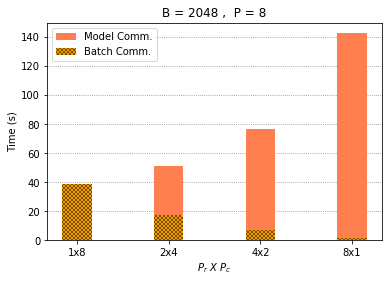

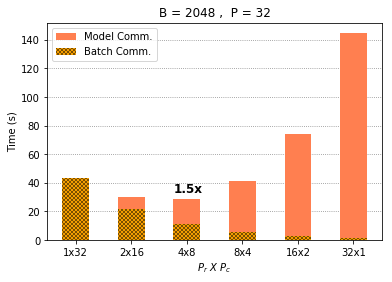

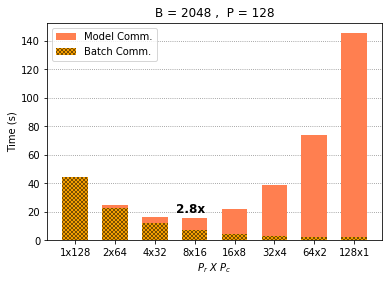

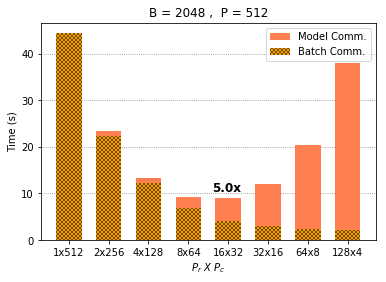

======== Strong Scaling (comm only)=========


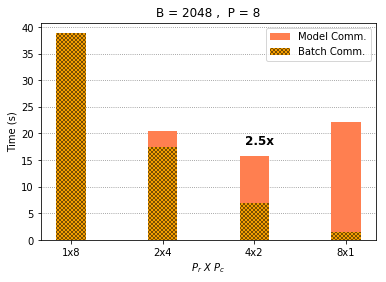

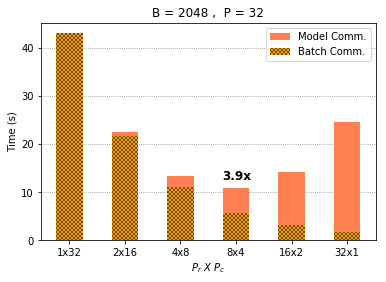

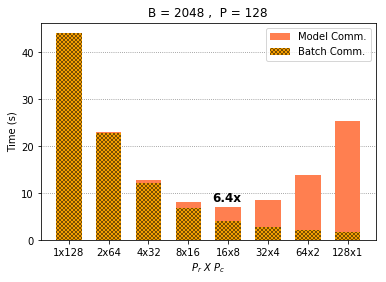

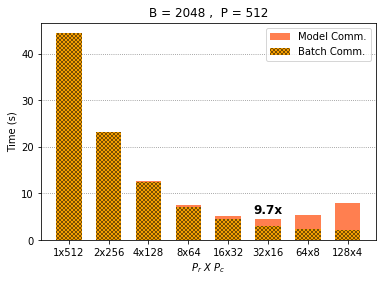

======== Strong Scaling (comm+comp)=========


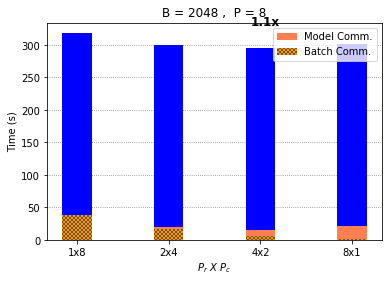

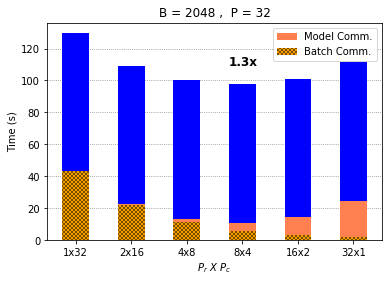

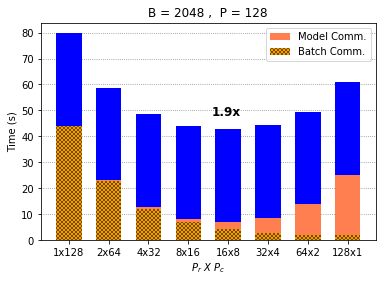

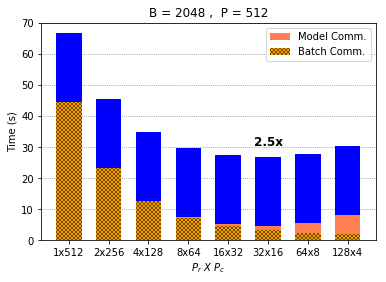

======== Strong Scaling (fixed B)=========


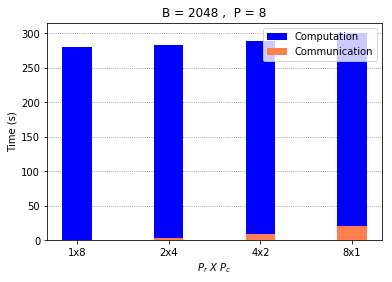

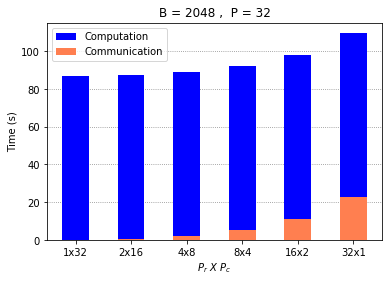

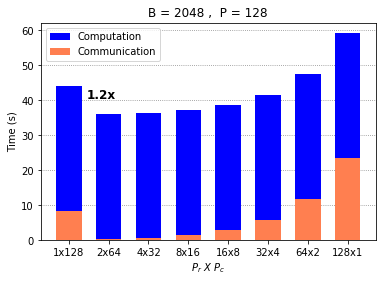

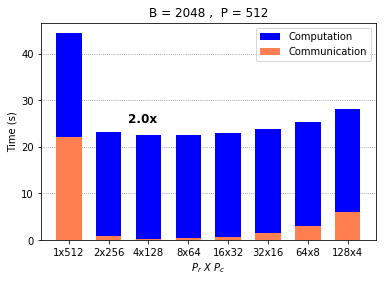

In [4]:
print("======== Strong Scaling (comm only)=========")
NaiveAlexNetPlot(2048, 8, commOnly=1)
NaiveAlexNetPlot(2048, 32,  commOnly=1)
NaiveAlexNetPlot(2048, 128, commOnly=1)
NaiveAlexNetPlot(2048, 512, commOnly=1)

print("======== Strong Scaling (comm only)=========")
DNNPlot(2048, 8, "AlexNet", commOnly=1)
DNNPlot(2048, 32, "AlexNet", commOnly=1)
DNNPlot(2048, 128, "AlexNet", commOnly=1)
DNNPlot(2048, 512, "AlexNet", commOnly=1)


print("======== Strong Scaling (comm+comp)=========")
DNNPlot(2048, 8, "AlexNet")
DNNPlot(2048, 32, "AlexNet")
DNNPlot(2048, 128, "AlexNet")
DNNPlot(2048, 512, "AlexNet")


print("======== Strong Scaling (fixed B)=========")
DNNPlot(2048, 8, "AlexNet", plotType="overlap")
DNNPlot(2048, 32, "AlexNet", plotType="overlap")
DNNPlot(2048, 128, "AlexNet", plotType="overlap")
DNNPlot(2048, 512, "AlexNet", plotType="overlap")



======== Weak Scaling AlexNet (comm only) =========


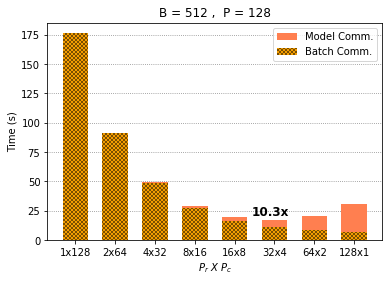

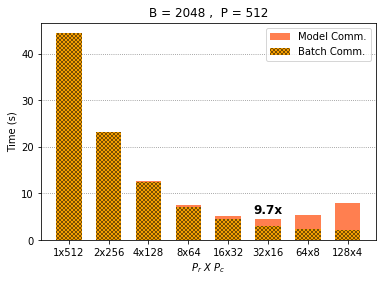

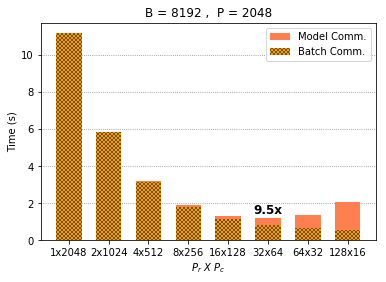

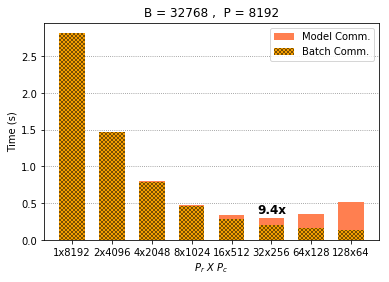

======== Weak Scaling AlexNet (comp+comm) =========


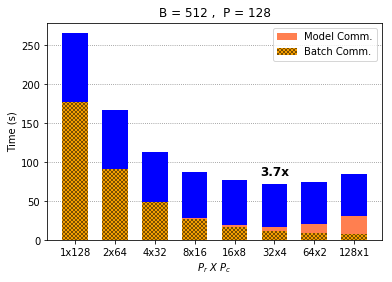

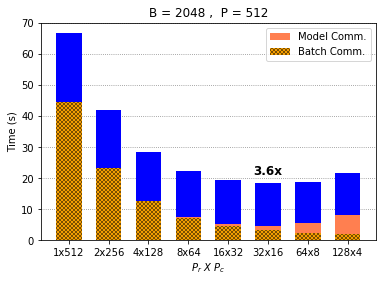

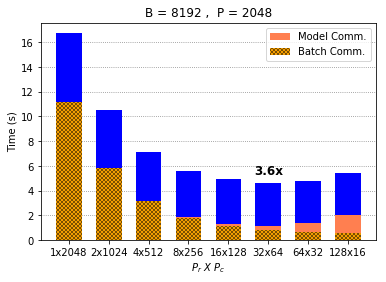

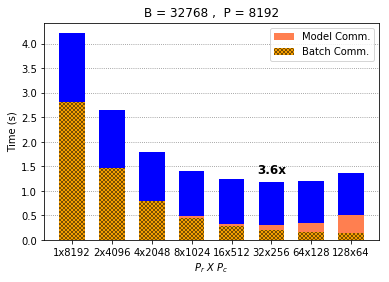

======== Weak Scaling AlexNet (Overlap)=========


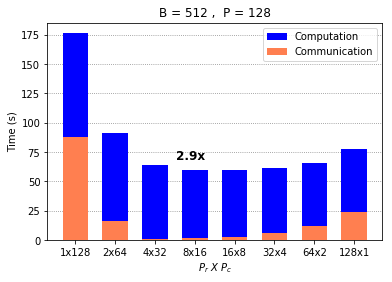

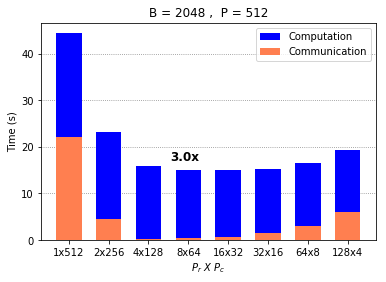

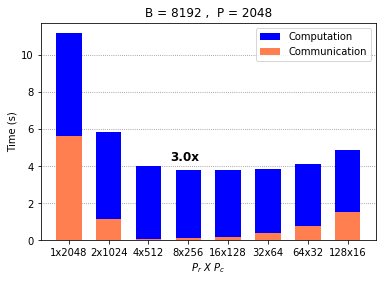

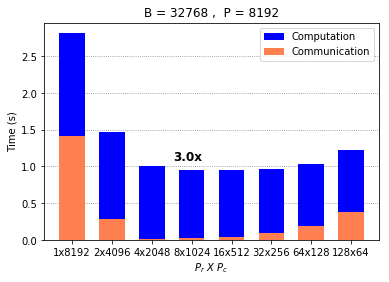

In [64]:
print("======== Weak Scaling AlexNet (comm only) =========")

DNNPlot(512, 128, "AlexNet", commOnly=1)
DNNPlot(2048, 512, "AlexNet", commOnly=1)
DNNPlot(8192, 2048, "AlexNet", commOnly=1)
DNNPlot(32768, 8192, "AlexNet", commOnly=1)


print("======== Weak Scaling AlexNet (comp+comm) =========")

DNNPlot(512, 128, "AlexNet")
DNNPlot(2048, 512, "AlexNet")
DNNPlot(8192, 2048, "AlexNet")
DNNPlot(32768, 8192, "AlexNet")

print("======== Weak Scaling AlexNet (Overlap)=========")

DNNPlot(512, 128, "AlexNet", plotType="overlap")
DNNPlot(2048, 512, "AlexNet", plotType="overlap")
DNNPlot(8192, 2048, "AlexNet", plotType="overlap")
DNNPlot(32768, 8192, "AlexNet", plotType="overlap")




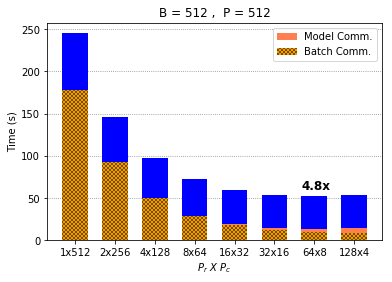

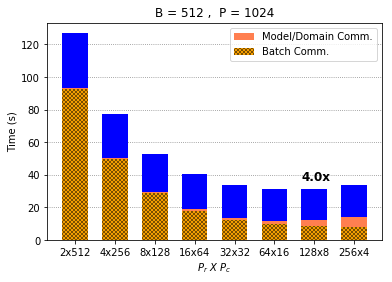

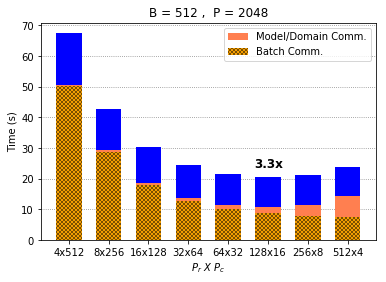

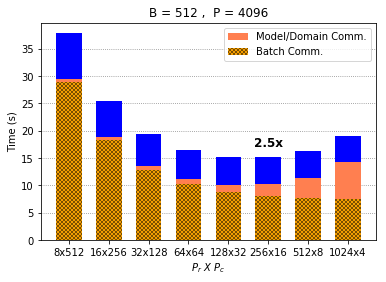

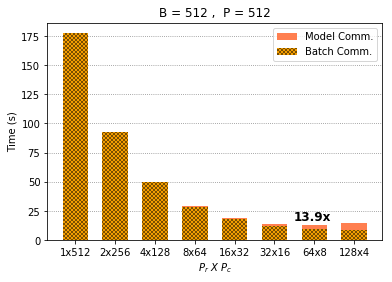

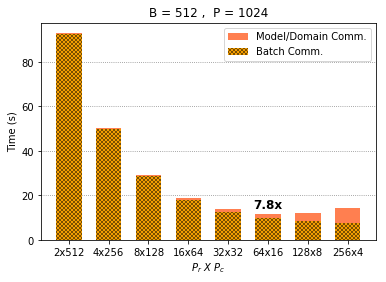

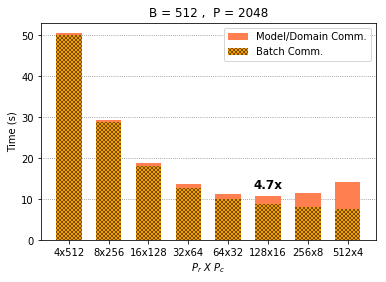

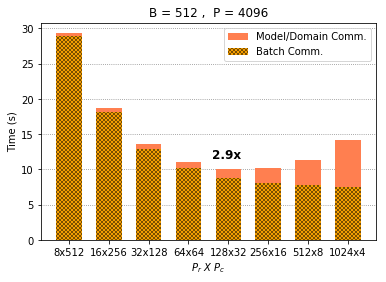

In [60]:
# we will keep only one of them
DNNPlot(512, 512, "AlexNet")
DNNPlot(512, 1024, "AlexNet")
DNNPlot(512, 2048, "AlexNet")
DNNPlot(512, 4096, "AlexNet")

DNNPlot(512, 512, "AlexNet", commOnly=1)
DNNPlot(512, 1024, "AlexNet", commOnly=1)
DNNPlot(512, 2048, "AlexNet", commOnly=1)
DNNPlot(512, 4096, "AlexNet", commOnly=1)



In [1]:
a="azad"
b = "hi"+a
print(b)

hiazad


======== Weak Scaling Naive AlexNet (comp+comm) =========


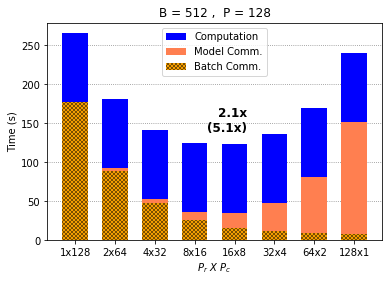

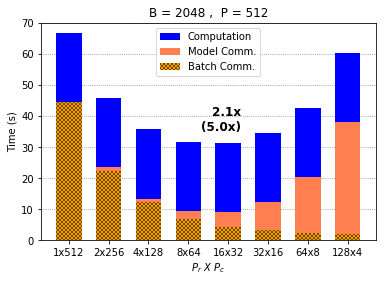

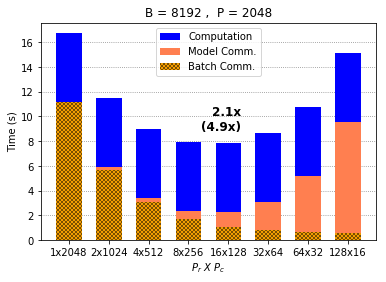

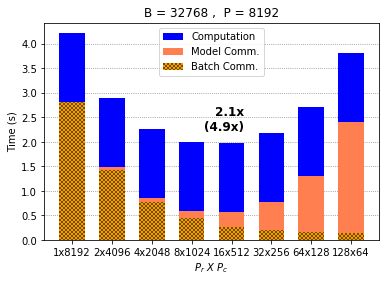

In [11]:


print("======== Weak Scaling Naive AlexNet (comp+comm) =========")
NaiveAlexNetPlot(512, 128)
NaiveAlexNetPlot(2048, 512)
NaiveAlexNetPlot(8192, 2048)
NaiveAlexNetPlot(32768, 8192)



breakdown:  0.00301573163708051   0.0017301233520507812   0.0047458549891312915
breakdown:  7e-05   1.2e-05   0.001437865818540255   0.0008530616760253906
best_time_ind:  5 best_comm_ind:  5
best Wcomm:  11.1242840945 best_other:  5.95002401454
breakdown:  0.0030727143042286235   0.0021806541900634764   0.0052533684942921
breakdown:  9e-05   2.4e-05   0.0014463571521143117   0.0010663270950317383
best_time_ind:  5 best_comm_ind:  5
best Wcomm:  3.07847393766 best_other:  1.48750600363
breakdown:  0.0031169599710156514   0.0023112868995666504   0.005428246870582302
breakdown:  0.00010999999999999999   3.6e-05   0.0014484799855078259   0.0011196434497833252
best_time_ind:  5 best_comm_ind:  5
best Wcomm:  0.797952289976 best_other:  0.373145703983
breakdown:  0.0031580213877124086   0.0023619450769424436   0.005519966464654852
breakdown:  0.00013   4.8e-05   0.0014490106938562044   0.001132972538471222
best_time_ind:  5 best_comm_ind:  5
best Wcomm:  0.204238759192 best_other:  0.0939210

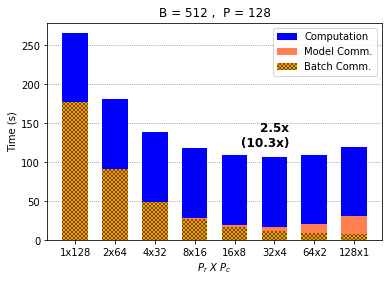

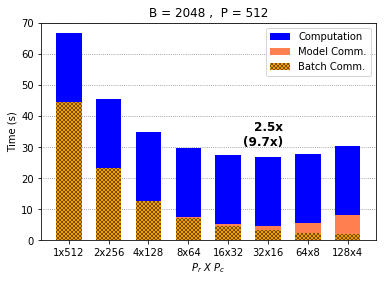

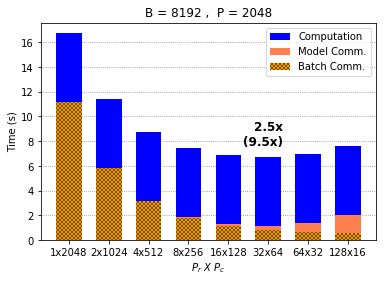

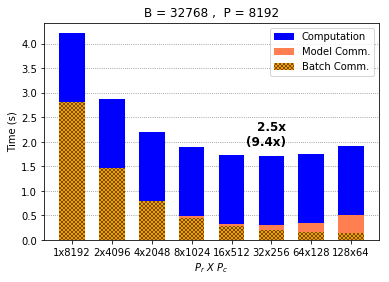

In [42]:
DNNPlot(512, 128, "AlexNet")
DNNPlot(2048, 512, "AlexNet")
DNNPlot(8192, 2048, "AlexNet")
DNNPlot(32768, 8192, "AlexNet")



In [18]:
breakdown:  7.068874957316716   4.055409137207031   11.124284094523746
best_time_ind:  5 best_comm_ind:  5
best Wcomm:  11.1242840945 best_other:  5.95002401454
breakdown:  1.8006105822779734   1.2778633553771972   3.0784739376551706
best_time_ind:  5 best_comm_ind:  5
best Wcomm:  3.07847393766 best_other:  1.48750600363
breakdown:  0.45819311573930077   0.3397591742362976   0.7979522899755984
best_time_ind:  5 best_comm_ind:  5
best Wcomm:  0.797952289976 best_other:  0.373145703983
breakdown:  0.11684679134535912   0.08739196784687041   0.20423875919222953
best_time_ind:  5 best_comm_ind:  5
best Wcomm:  0.204238759192 best_other:  0.0939210275332

SyntaxError: invalid syntax (<ipython-input-18-37378c95cb0f>, line 1)

In [36]:

1.2778633553771972/0.3397591742362976



3.7610856520638403

In [25]:
5.95002401454/1.48750600363


4.000000000013445

In [27]:
0.797952289976/0.204238759192

3.9069581754845273